In [1]:
lambda = 10;
exact = x -> sinh(lambda*x)/sinh(lambda) - 1;

These functions define the ODE.

In [2]:
p = x -> 0;
q = x -> -lambda^2;
r = x -> lambda^2;

We compare the computed solution to the exact one for increasing $n$. 

In [3]:
include("../FNC.jl")
n = [32,64,128,256,512]
err = zeros(size(n))
using LinearAlgebra:norm
for (k,n) = enumerate(n)
    x,u = FNC.bvplin(p,q,r,[0,1],-1,0,n)
    
    err[k] = norm(exact.(x)-u,Inf)
end

using DataFrames
DataFrame(n=n,error=err)

,n,error
,Int64,Float64
1,32,0.00148047
2,64,0.000372619
3,128,9.34931e-5
4,256,2.33831e-5
5,512,5.84704e-6


Each time $n$ is doubled, the error is reduced by a factor very close to 4, which is indicative of second order convergence.

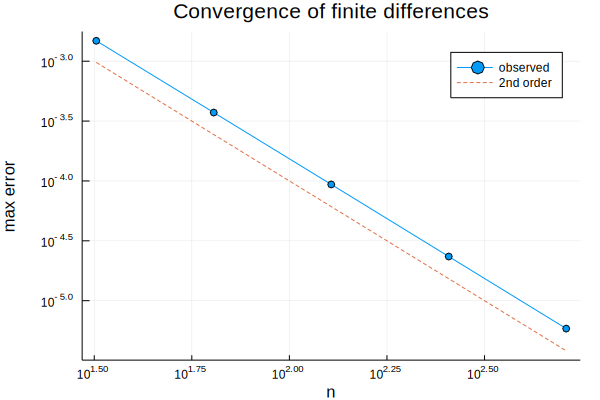

In [4]:
using Plots
plot(n,err,m=(:o,3),label="observed",
    xaxis=(:log10,"n"), yaxis=(:log10,"max error"),
    title="Convergence of finite differences") 
plot!(n,n.^(-2),l=:dash,label="2nd order")